# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dspin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
news_api_key = os.getenv("NEWS_API_KEY")
# Uncomment below to see if new_api_key pulls in from.en
# print(news_api_key) 

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=news_api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin",language="en",sort_by="relevancy")

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q='ethereum',language="en",sort_by="relevancy")

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "Text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
btc = btc[cols]

btc.head()

,Compound,Positive,Negative,Neutral,Text
0,0.5859,0.124,0.000,0.876,Even if you arent paying attention to Bitcoin ...
1,0.3182,0.105,0.000,0.895,El Salvador introduced Bitcoin as a legal tend...
2,-0.3182,0.045,0.084,0.871,Israeli national Tal Prihar pled guilty to rou...
3,-0.7096,0.000,0.169,0.831,Netflix\r\n is making a docuseries about one o...
4,0.6808,0.185,0.000,0.815,British entrepreneur and financier Richard ODe...


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
    
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth= pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
eth = eth[cols]

eth.head()

,Compound,Positive,Negative,Neutral,Text
0,-0.2023,0.039,0.062,0.899,If people who buy cryptocurrencies intended on...
1,-0.2498,0.000,0.059,0.941,"Technical analysis isnt a perfect tool, but it..."
2,0.0000,0.000,0.000,1.000,This enables an L1 platform to bootstrap its n...
3,0.0000,0.000,0.000,1.000,"The means-and-ends moralists, or non-doers, al..."
4,0.6705,0.188,0.000,0.812,Coinbase reported that the share of trading vo...


In [8]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.181095,0.090800,0.041600,0.867600
std,0.459473,0.059023,0.057329,0.061515
min,-0.709600,0.000000,0.000000,0.729000
25%,-0.225725,0.045750,0.000000,0.834750
50%,0.295700,0.092500,0.000000,0.873500
75%,0.585900,0.145250,0.085500,0.901500
max,0.778300,0.185000,0.169000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.100645,0.059100,0.026400,0.914550
std,0.351331,0.074079,0.048366,0.088084
min,-0.680800,0.000000,0.000000,0.766000
25%,-0.025675,0.000000,0.000000,0.822500
50%,0.000000,0.042500,0.000000,0.942500
75%,0.232225,0.082750,0.041750,1.000000
max,0.834100,0.234000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the higher positive mean score of 0.090800 vs ethereum with 0.059100.

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score, max: 0.834100. Bitcoins is only 0.778300.

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score, max: 0.234000. Bitcoin is only 0.185000.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [25]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("t")
stop.append("it")
stop.append("s")
stop.append("'s")
stop.append("'d")
stop.append("n't")
stop.append('…')
stop.append("\'")
stop.append('’')
stop.append("chars")
stop.append("'")
stop.append("reuters")
stop.append('alex')
stop.append('castro')
stop.append('illustration')
stop.append('el')
stop.append('salvador')
stop.append('feb')
stop.append('time')
stop.append("newsletter")
stop.append("lichtensteins")
stop.append("mr.")
stop.append("arent")
stop.append("paying")
stop.append("even")
stop.append("attention")
stop.append("might")
stop.append("noticed")
stop.append("last")
stop.append("week")
stop.append("total")
stop.append("version")
stop.append("article")
stop.append("published")
stop.append("subscribe")
stop.append("weekly")
stop.append("guide")
stop.append("future")
stop.append("find")
stop.append("past")
stop.append("issue")
stop.append("324")
stop.append("million")
stop.append("getty")
stop.append("images")
stop.append("profile")
stop.append("picture")
stop.append("images")
stop.append("made")
stop.append("nearly")
stop.append("internet")
stop.append("intended")
stop.append("online")
stop.append("people")
stop.append("non")
stop.append("end")
stop.append("said")
stop.append("true")
stop.append("shell")
stop.append("making")
stop.append("tr")
stop.append("known")
stop.append("announced")
stop.append("based")
stop.append("always")
stop.append("point")
stop.append("via")
stop = set(stop)

In [26]:
# Uncomment below to see stopwords
# print(stop)

In [27]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
   # regex = re.compile("[^a-zA-Z0-9-_*. ]")
    #re_clean = regex.sub('', text)
    #words = word_tokenize(re_clean)
   
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation from text
    words = list(filter(lambda t: t not in punctuation, words))
   
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
   
    return tokens

In [28]:
# Create a new tokens column for Bitcoin
btc["tokens"] = btc.Text.apply(tokenizer)
btc.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.5859,0.124,0.000,0.876,Even if you arent paying attention to Bitcoin ...,"[Bitcoin, cryptocurrencies, value, plummeted, ..."
1,0.3182,0.105,0.000,0.895,El Salvador introduced Bitcoin as a legal tend...,"[introduced, Bitcoin, legal, tender, alongside..."
2,-0.3182,0.045,0.084,0.871,Israeli national Tal Prihar pled guilty to rou...,"[Israeli, national, Tal, Prihar, pled, guilty,..."
3,-0.7096,0.000,0.169,0.831,Netflix\r\n is making a docuseries about one o...,"[Netflix, docuseries, one, worst, rapper, Coin..."
4,0.6808,0.185,0.000,0.815,British entrepreneur and financier Richard ODe...,"[British, entrepreneur, financier, Richard, OD..."


In [29]:
# Create a new tokens column for Ethereum
eth["tokens"] = eth.Text.apply(tokenizer)
eth.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,-0.2023,0.039,0.062,0.899,If people who buy cryptocurrencies intended on...,"[buy, cryptocurrencies, hold, speculative, inv..."
1,-0.2498,0.000,0.059,0.941,"Technical analysis isnt a perfect tool, but it...","[Technical, analysis, isnt, perfect, tool, may..."
2,0.0000,0.000,0.000,1.000,This enables an L1 platform to bootstrap its n...,"[enables, L1, platform, bootstrap, national, e..."
3,0.0000,0.000,0.000,1.000,"The means-and-ends moralists, or non-doers, al...","[means-and-ends, moralist, non-doers, end, wit..."
4,0.6705,0.188,0.000,0.812,Coinbase reported that the share of trading vo...,"[Coinbase, reported, share, trading, volume, e..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [30]:
from collections import Counter
from nltk import ngrams

In [31]:
# Generate the Bitcoin N-grams where N=2
N=2
grams=ngrams(tokenizer(btc.Text.str.cat()), N)
Counter(grams).most_common(10)

[(('alongside', 'US'), 2),
 (('US', 'dollar'), 2),
 (('International', 'Monetary'), 2),
 (('Monetary', 'Fund'), 2),
 (('Bitcoin', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'value'), 1),
 (('value', 'plummeted'), 1),
 (('plummeted', 'value'), 1),
 (('value', 'market'), 1),
 (('market', 'tumbling'), 1)]

In [32]:
# Generate the Ethereum N-grams where N=2
N=2
grams=ngrams(tokenizer(eth.Text.str.cat()), N)
Counter(grams).most_common(10)

[(('trading', 'volume'), 2),
 (('worth', 'Hackers'), 2),
 (('cryptocurrency', 'Wormhole'), 2),
 (('Wormhole', 'developer'), 2),
 (('Metaverse', 'issue'), 2),
 (('buy', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'hold'), 1),
 (('hold', 'speculative'), 1),
 (('speculative', 'investment'), 1),
 (('investment', 'real'), 1)]

In [33]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [34]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.Text.str.cat())
token_count(all_tokens,10)

[('Bitcoin', 14),
 ('cryptocurrency', 4),
 ('dollar', 3),
 ('Verge', 3),
 ('money', 3),
 ('one', 3),
 ('wallet', 3),
 ('cryptocurrencies', 2),
 ('value', 2),
 ('legal', 2)]

In [35]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth.Text.str.cat())
token_count(all_tokens,10)

[('cryptocurrency', 5),
 ('Bitcoin', 5),
 ('Ethereum', 4),
 ('token', 4),
 ('ethereum', 4),
 ('investment', 3),
 ('crypto', 3),
 ('platform', 3),
 ('share', 3),
 ('year', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

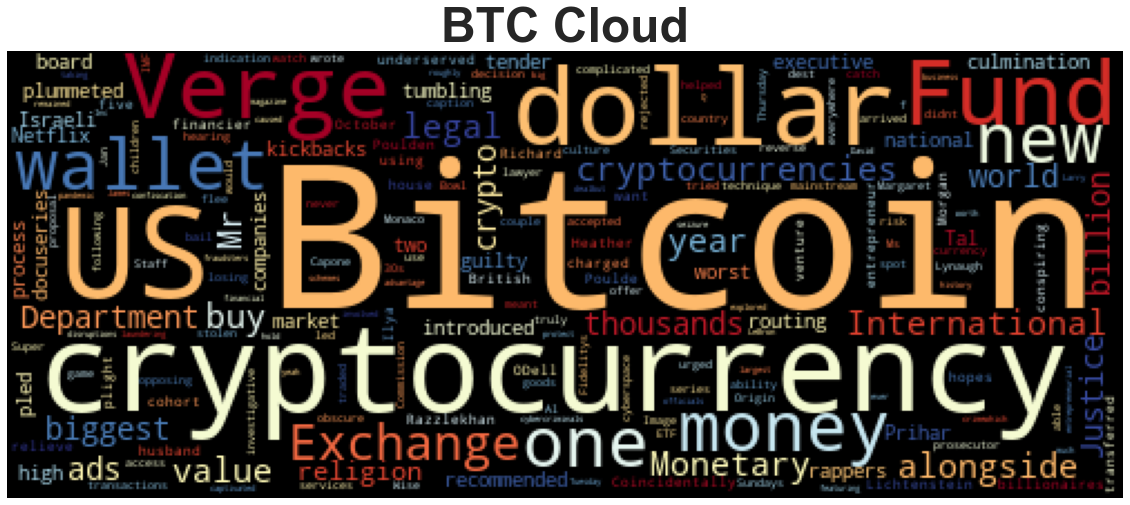

In [37]:
# Generate the Bitcoin word cloud
def wordcloud(text,title=""):
    df_cloud = WordCloud(stopwords=stop, width=500,colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize":48,"fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

wordcloud(btc.Text.str.cat(),title = "BTC Cloud", )

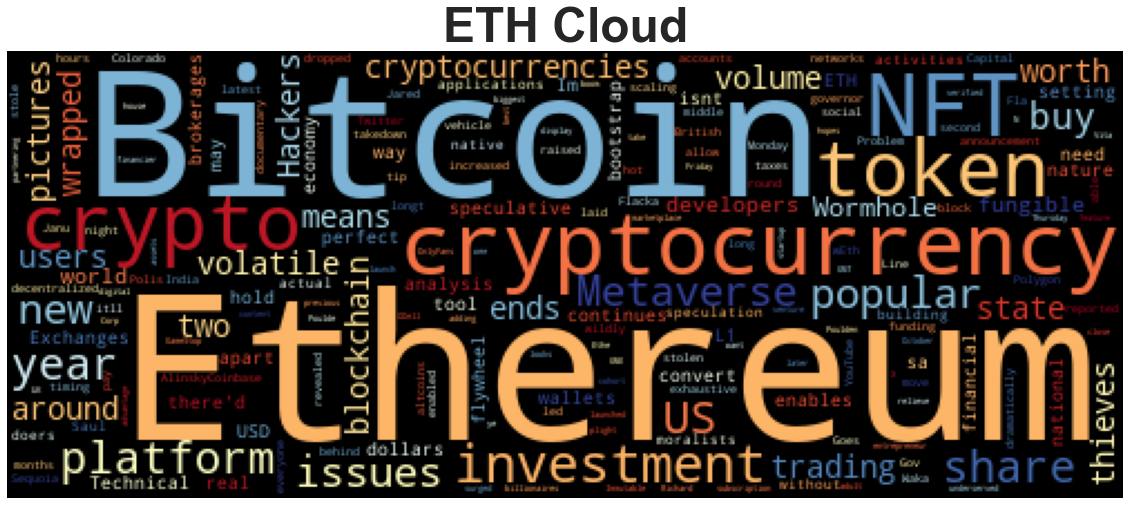

In [38]:
# Generate the Ethereum word cloud
wordcloud(eth.Text.str.cat(), title = "ETH Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
all_btc_txt = btc.Text.str.cat()

In [ ]:
# Run the NER processor on all of the text
btc_doc = nlp(all_btc_txt)

# Add a title to the document
btc_doc.user_data["title"] = "BTC NER"

In [ ]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [ ]:
# List all Entities
btc_entities = [ent.text for ent in btc_doc.ents]
btc_entities

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
all_eth_txt = eth.Text.str.cat()

In [ ]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_txt)

# Add a title to the document
eth_doc.user_data["title"] = "ETH NER"

In [ ]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [ ]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents]
eth_entities

---